<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 모델링

확률적 모델링은 통계학 이론을 데이터 분석에 응용한 것이다.

초창기 머신 러닝 형태 중 하나고 요즘도 널리 사용된다.

가장 잘 알려진 알고리즘 중 하나는 나이브 베이즈(naive bayes) 알고리즘이다.

나이브 베이즈 알고리즘은 입력 데이터의 특성이 모두 독립적이라고 가정하고 베이즈 정리를 적용하는 머신 러닝 분류 알고리즘이다. - 베이즈 통계와 관련이 있다.

---

# 커널 방법

커널(kernel) 방법은 분류 알고리즘의 한 종류를 말하며, 서포트 벡터 머신(support vector machine, SVM)이 가장 유명하다.

# MNIST 분류 문제

In [57]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [2]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
from keras import models
from keras import layers

# 층

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층(layer)이다.
어떤 데이터가 들어가면 더 유용한 형태로 출력이 된다.

In [4]:
net=models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10,activation='softmax'))

# 신경망이 훈련을 하기 위해서는 컴파일 단계가 필요하다.

1. 손실 함수(loss function): 훈련 데이터에서 신경망의 성능을 측정하고, 네트워크가 옳은 방향으로 학습될 수 있도록 해준다.

2. 옵티마이저(optimizer): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘이다.

3. 모니터링할 지표: accuracy, rmse 등...

In [5]:
net.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

# 데이터 전처리

신경망은 입력 데이터의 스케일에 민감하기 때문에 적절한 데이터 전처리 과정이 필요하다. (일반적으로 0과 1사이의 값으로 스케일)

In [58]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

# 레이블 변환

훈련 데이터의 개수가 n이고, 클래스의 개수가 k일때, to_categorical 함수는 입력받은 (n) 크기의 1차원 정수 배열을 (n,k) 크기의 2차원 배열로 변경한다.

# 이제는 케라스가아니라 텐서플로

케라스가 텐서플로로 옮겨갔다 그래서

from tensorflow.keras.utils import to_categorical이라고 해야함

In [59]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [60]:
net.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 8ms/step - loss: 15.5092 - accuracy: 0.9344
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 5.8079 - accuracy: 0.9413
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 2.3556 - accuracy: 0.9439
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 1.2058 - accuracy: 0.9475
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.7605 - accuracy: 0.9533


In [61]:
#float32 랑 float64의 정확도가 다르다.

# 데이터 타입이 float32 라면 각 값이 32비트로 저장된다.

test_loss, test_acc=net.evaluate(test_images, test_labels)
print('test_acc',test_acc)
print('test_loss',test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.7956 - accuracy: 0.9493
test_acc 0.9492999911308289
test_loss 0.7955644130706787


# 텐서

텐서는 데이터를 위한 컨테이너 이다.

항상 수치형 데이터를 다루므로, 숫자를 위한 컨테이너라고 볼 수 있다.

텐서는 임의의 차원 개수를 갖는 행렬의 일반화된 모습이다.(텐서에서는 차원을 종종 축이라고 부른다.)


## 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)(또는 스칼라 텐서, 0차원 텐서, 0D 텐서)라고 부른다.

넘파이에서는 float 32, 64타입의 숫자가 스칼라 텐서(또는 배열 스칼라(array scalar))이다.

ndim속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있다. 

스칼라 텐서의 축 개수는 0이다.(ndim == 0)

텐서의 축 개수를 랭크(rank)라고 부른다. 

## 벡터(1D 텐서)

숫자의 배열을 벡터 또는 1D 텐서라고 부른다.

1D 텐서는 딱 하나의 축을 갖는다.

## 행렬(2D 텐서)

벡터의 배열이 행렬, 2D 텐서이다.

행렬에는 2개의 축이 있다.(행과 열이라고 부른다.)

행렬은 숫자가 채워진 사각 격자라고 볼 수 있다.

## 3D 텐서와 고차원 텐서

직육면체 형태로 해석할 수 있는 3D 텐서이다.

동영상의 경우 5D텐서까지 가기도 한다.

## 

In [34]:
import numpy as np
x=np.array(12)
print(x.ndim)

x=np.array([1,2,3,4,5])
print(x.ndim)
x=np.array([[1,2,3,4,5],
           [2,3,4,5,6],
           [3,4,5,6,7]])
print(x.ndim)

x=np.array([[[1,2,3,4,5],
             [2,3,4,5,6],
             [3,4,5,6,7]],
            [[11,22,33,44,55],
             [22,33,44,55,66],
             [33,44,55,66,77]]])
print(x.ndim)


0
1
2
3


In [37]:
len(train_images[0])

784

In [39]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [54]:
import pandas as pd
pd.DataFrame(train_x[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [55]:
# [] 하나가 데이터 프레임의 가로가 된다.
# 28개의 행, 28개의 열이 모여서 하나의 이미지를 이루고 이게 60,000개 있으면 (60000,28,28)이 되는 것
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# 손실 함수와 옵티마이저

## 손실 함수(목적 함수)

훈련 하는 동안 최소활 될 값이다.

주어진 문제에 대한 성공의 지표가 된다.

## 옵티마이저(optimizer)

손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정한다.

특정 종류의 확률적 경사 하강법을 구현한다(Stochastcie Gradient Decent).

여러 개의 출력을 갖는 신경망은 여러 개의 손실 함수를 가질 수 있다.

하지만, 경사 하강법 과정은 스칼라 손실 값을 기준으로 한다. 따라서 손실이 여러 개인 네트워크에서는 모든 손실이(평균을 내서) 하나의 스칼라 양으로 합쳐진다.



# IMDB 예제

0은 부정을 나타내고, 1은 긍정을 나타낸다.

In [1]:
from keras.datasets import imdb
(train_data, train_labels), ( test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
test_labels[0]

0

# 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없다.

리스트를 텐서로 바꾸는 두 가지 방법이 있다.

같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다.

그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다(embedding 층을 말한다).

리스트를 원-핫 인코딩 하여 0과 1의 벡터로 변환한다. 

예를 들어, 시퀀스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다.

그 다음 부동소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다.

In [8]:
import numpy as np

def vectorize(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    results[1, sequence] = 1.
  return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [9]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
# 레이블을 벡터로 바꾸기

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기

입력데이터가 벡터고, 레이블은 스칼라이다.

Dense 층에 전달한 매개변수(16) 이라는 것은 은닉 유닛의 개수이다.

하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.

은닉 유닛을 늘리면 신경망이 더욱 복잡한 표현을 학습할 수 있지만, 계산 비용이 커지고 원하지 않는 패턴을 학습할 수 있다(과적합 문제 발생할 수도 있다).

중간에 있는 은닉 층은 활성화 함수로 relu를 사용하고 마지막 층은 확률을 출력하기 위해서 시그모이드 함수를 사용한다.

relu는 음수를 0으로 만드는 함수이다.

시그모이드는 임의의 값을 [0,1] 사이로 압축하므로, 출력 값을 확률처럼 해석할 수 있다.


In [46]:
# 모델구축

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation ='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 손실함수와 옵티마이저

확률을 출력하는 모델이므로, 크로스 엔트로피가 최선의 선택이다.

크로스 엔트로피(cross_entropy)는 정보이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정한다.

In [47]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [51]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_train, y_train))

Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.6932 - accuracy: 0.4912 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.6931 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.6931 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
49

# 훈련과 검증 손실 그리기

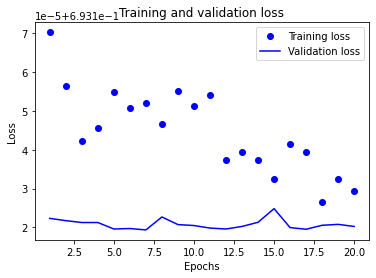

In [52]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=(range(1, len(loss) + 1))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

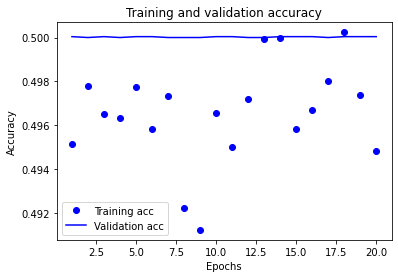

In [53]:
plt.clf() # 그래프 초기화 하기

acc = history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

25000